In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('dataset.csv')

In [3]:
#count number of rows and columns of the dataset
df.shape

(1000, 16)

In [4]:
df.head(7)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
5,F,58,1,1,1,2,2,2,2,1,2,2,1,1,2,YES
6,F,70,1,1,1,2,2,1,2,2,2,2,2,2,1,YES


In [5]:
#Checking for any null values in dataset
#count the number of empty (NaN,NAN,na) values in each column
df.isnull().sum()


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
#drop the columns with all missing values
df=df.dropna(axis=1)

In [7]:
#get the new count of the rows and columns of the dataset
df.shape

(1000, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 1000 non-null   object
 1   AGE                    1000 non-null   int64 
 2   SMOKING                1000 non-null   int64 
 3   YELLOW_FINGERS         1000 non-null   int64 
 4   ANXIETY                1000 non-null   int64 
 5   PEER_PRESSURE          1000 non-null   int64 
 6   CHRONIC_DISEASE        1000 non-null   int64 
 7   FATIGUE                1000 non-null   int64 
 8   ALLERGY                1000 non-null   int64 
 9   WHEEZING               1000 non-null   int64 
 10  ALCOHOL_CONSUMING      1000 non-null   int64 
 11  COUGHING               1000 non-null   int64 
 12  SHORTNESS_OF_BREATH    1000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  1000 non-null   int64 
 14  CHEST_PAIN             1000 non-null   int64 
 15  LUNG_CANCER           

In [9]:
#get a count of the number of effected lung cancer (YES)or not effected(NO)
df['LUNG_CANCER'].value_counts()


LUNG_CANCER
YES    528
NO     472
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

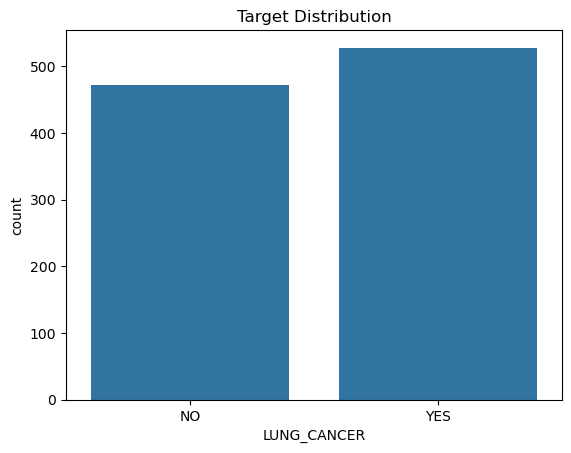

In [10]:
#Let's check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution')

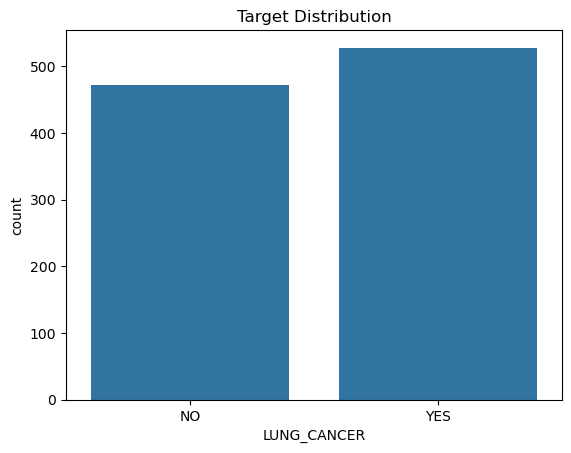

In [11]:
#visualize the count
sns.countplot(x='LUNG_CANCER',data=df,)
plt.title('Target Distribution')
plt.show()

In [12]:
#look at the datatypes to see which columns need to be encoded
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [13]:
#create a pair plot
#sns.pairplot(df , hue='GENDER')

In [14]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.438000,1.486000,1.492000,1.49000,1.50000,1.498000,1.513000,1.507000,1.514000,1.488000,1.519000,1.50000,1.493000,1.515000
std,14.932285,0.500054,0.500186,0.50015,0.50025,0.500246,0.500081,0.500201,0.500054,0.500106,0.499889,0.50025,0.500201,0.500025
min,30.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
50%,55.000000,1.000000,1.000000,1.00000,1.50000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.50000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000


In [15]:
#Checking for Duplicates
df.duplicated().sum()

0

In [16]:
#Removing Duplicates
df=df.drop_duplicates()

In [17]:
#Assigning dependent and independent variables
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'column_name' is the column with categorical data
le = LabelEncoder()
feature_cols = ['GENDER','AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING',	'COUGHING','SHORTNESS_OF_BREATH',	'SWALLOWING_DIFFICULTY','CHEST_PAIN']
x=df[feature_cols]
y = le.fit_transform(df['LUNG_CANCER'])

In [18]:
# prompt: # Convert categorical features to numerical using one-hot encoding
# x = d.get_dummies(x)
# Assuming 'x' contains your categorical features
ohe = OneHotEncoder()
x_encoded = ohe.fit_transform(x)


In [19]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC_DISEASE']=le.fit_transform(df['CHRONIC_DISEASE'])
df['FATIGUE']=le.fit_transform(df['FATIGUE'])
df['ALLERGY']=le.fit_transform(df['ALLERGY'])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL_CONSUMING']=le.fit_transform(df['ALCOHOL_CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS_OF_BREATH']=le.fit_transform(df['SHORTNESS_OF_BREATH'])
df['SWALLOWING_DIFFICULTY']=le.fit_transform(df['SWALLOWING_DIFFICULTY'])
df['CHEST_PAIN']=le.fit_transform(df['CHEST_PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [20]:
#splitting the dataset into Training and Testing Dataset

x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.2, random_state=42)
display(x_train.shape, y_train.shape, x_test.shape,
y_test.shape)


(800, 15)

(800,)

(200, 15)

(200,)

In [21]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'column_name' is the column with categorical data
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

In [22]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data' is your DataFrame and 'column_name' is the column with categorical data
one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(df[['GENDER']])

In [23]:
df['GENDER'] = df['GENDER'].astype(float)

In [24]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Select only numerical columns for scaling
numerical_cols = x_train.select_dtypes(include=['number']).columns
x_train_scaled = sc.fit_transform(x_train[numerical_cols])
x_test_scaled = sc.transform(x_test[numerical_cols])

# Optionally, convert the scaled arrays back to DataFrames
x_train_scaled = pd.DataFrame(x_train_scaled, columns=numerical_cols, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=numerical_cols, index=x_test.index)

In [25]:
#Fitting training data to the model
logreg_model=LogisticRegression(random_state=42)
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Iterate through all columns in x_train
for col in x_train.columns:
    if x_train[col].dtype == 'object':  # Check if the column is of object type (likely string)
        x_train[col] = label_encoder.fit_transform(x_train[col])



# Fit and transform y_train to numerical labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Fit the model using encoded labels
logreg_model.fit(x_train, y_train_encoded)


LogisticRegression(random_state=42)

In [26]:
#Predicting result using testing data


#Predicting result using testing data
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through all columns in x_test
for col in x_test.columns:
    if x_test[col].dtype == 'object':  # Check if the column is of object type (likely string)
        x_test[col] = label_encoder.fit_transform(x_test[col]) # Encode categorical features in x_test

y_logreg_pred= logreg_model.predict(x_test)
y_logreg_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0], dtype=int64)

In [27]:
#Fitting the Model (Logistic Regression)
model= LogisticRegression(solver='lbfgs', max_iter=1000)
# Fit the model using encoded labels (assuming x_train and y_train_encoded are defined as in previous cells)
model.fit(x_train, y_train_encoded)  # Add this line to fit the model
y_pred=model.predict(x_test)


In [28]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)

Accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100), '%')

Confusion Matrix :  [[35 57]
 [36 72]]
Accuracy Score :  0.535
Accuracy in Percentage :  53 %


<Axes: xlabel='Predicted', ylabel='Actual'>

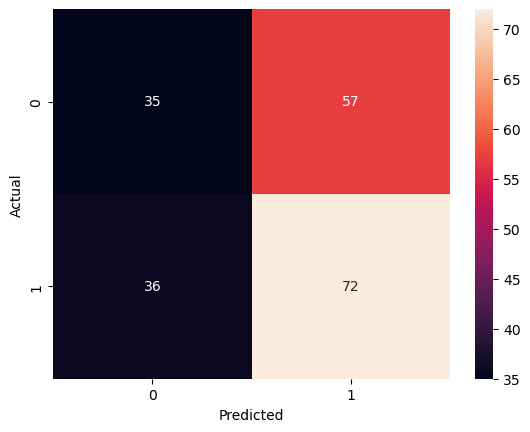

In [29]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)


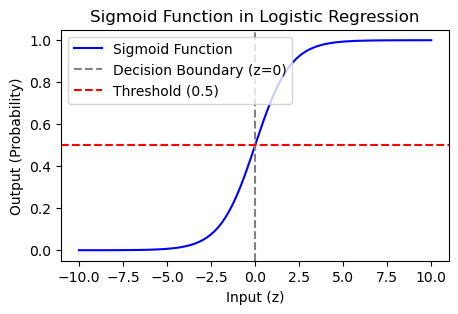

In [30]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate input values
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Reduce figure size
plt.figure(figsize=(5, 3))  # Adjust width and height

# Plot sigmoid curve
plt.plot(z, sigmoid_values, label="Sigmoid Function", color="blue")
plt.axvline(0, color="gray", linestyle="dashed", label="Decision Boundary (z=0)")
plt.axhline(0.5, color="red", linestyle="dashed", label="Threshold (0.5)")
plt.xlabel("Input (z)")
plt.ylabel("Output (Probability)")
plt.title("Sigmoid Function in Logistic Regression")
plt.legend()
plt.show()

In [31]:
#K NEAREST NEIGHBOR

In [32]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(x_test)
y_knn_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1])

In [34]:
#Model accuracy
from sklearn.metrics import classification_report  # <-- Add this import

# Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)


              precision    recall  f1-score   support

           0       0.41      0.37      0.39        92
           1       0.51      0.56      0.53       108

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.47      0.47      0.47       200



In [35]:
#SUPPORT VECTOR CLASSIFIER

In [36]:
#Fitting SVC to the training set
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [37]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(x_test)
y_svc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [38]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.54      1.00      0.70       108

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200



C:\Users\Aryan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aryan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aryan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\Aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


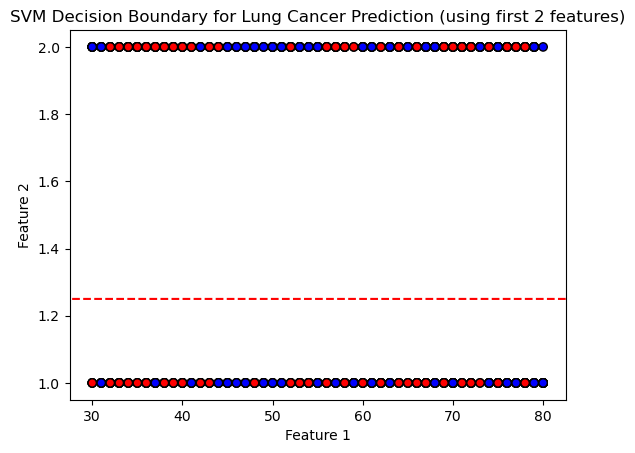

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset (replace 'data.csv' with your actual file)
df_plot = pd.read_csv('dataset.csv')

# Define features and target variable
x_plot = df_plot.drop(columns=["LUNG_CANCER"])  # Features
y_plot = df_plot["LUNG_CANCER"]  # Target

# Convert categorical features if needed
x_plot = pd.get_dummies(x_plot)  # One-hot encoding for categorical variables

# Split data into training and testing sets
x_train_plot, x_test_plot, y_train_plot, y_test_plot = train_test_split(x_plot, y_plot, test_size=0.2, random_state=42)

# Select only the first two features for training the plotting model
x_train_2features = x_train_plot.iloc[:, :2]

# Train SVM model using only the first two features
model_2features = SVC(kernel='linear', probability=True)
model_2features.fit(x_train_2features, y_train_plot)

# Plot decision boundary (for 2D visualization, selecting two features)
def plot_decision_boundary(clf, x, y):
    x_plot = x.values
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y.values)
    plt.scatter(x_plot[:, 0], x_plot[:, 1], c=y_encoded, cmap=plt.cm.bwr, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['dashed', 'solid', 'dashed'])
    plt.title("SVM Decision Boundary for Lung Cancer Prediction (using first 2 features)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model_2features, x_train_2features, y_train_plot)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


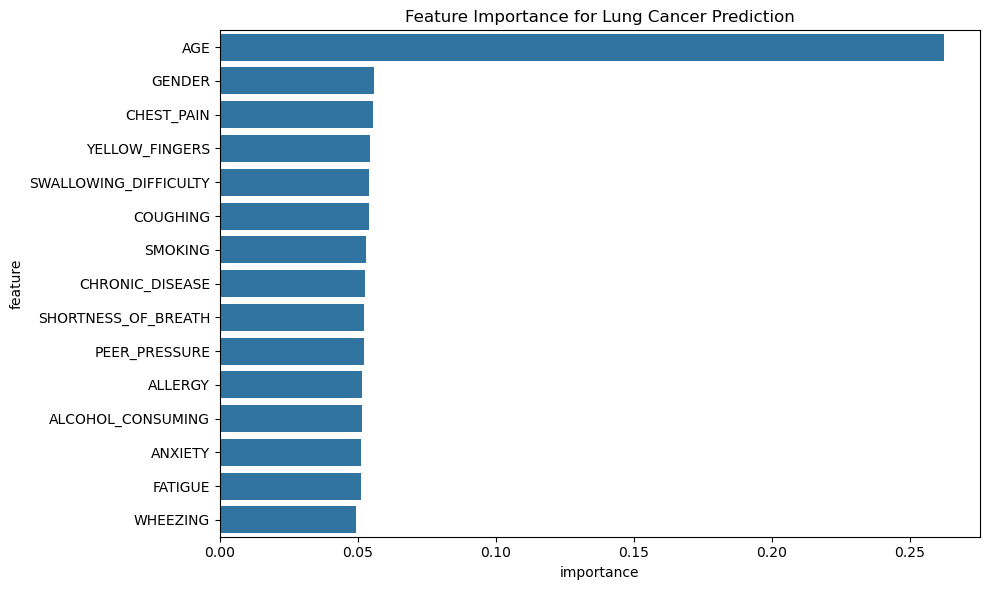

In [40]:
# Random Forest with hyperparameter tuning and feature importance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get best parameters and model
print("Best parameters:", grid_search.best_params_)
rf_model = grid_search.best_estimator_

# Get feature importance
importances = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance for Lung Cancer Prediction')
plt.tight_layout()
plt.show()

In [41]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(x_test)
y_rf_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0])

In [42]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.48      0.35      0.40        92
           1       0.55      0.68      0.61       108

    accuracy                           0.53       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.52      0.53      0.51       200



In [43]:
#XGBOOST

In [44]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Train XGBoost with already encoded labels
xgb_model.fit(x_train, y_train)  # y_train is already 0/1

# Predict
y_xgb_pred = xgb_model.predict(x_test)

# Evaluate
xgb_cr = classification_report(y_test, y_xgb_pred)  # y_test is already 0/1
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.48      0.41      0.44        92
           1       0.55      0.62      0.59       108

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.53      0.52       200



In [45]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(x_test)
y_xgb_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0])

In [46]:
#Model accuracy
from sklearn.metrics import classification_report
# Remove this line since y_test is already encoded:
# y_test_encoded = le.transform(y_test)

# Use y_test directly since it's already encoded
xgb_cr = classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.48      0.41      0.44        92
           1       0.55      0.62      0.59       108

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.53      0.52       200



In [47]:
# MULTI-LAYER PERCEPTION CLASSIFIER

In [48]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)

MLPClassifier()

In [49]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(x_test)
y_mlp_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [50]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

              precision    recall  f1-score   support

           0       0.49      0.36      0.41        92
           1       0.55      0.68      0.61       108

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.53      0.52       200



In [51]:
#GRADIENT BOOSTING CLASSIFIER

In [52]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [53]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(x_test)
y_gb_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0])

In [54]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.51      0.46      0.48        92
           1       0.57      0.62      0.60       108

    accuracy                           0.55       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.55      0.54       200



In [56]:
# Save all trained models as pickle files
import pickle

with open('logistic_regression.pkl', 'wb') as f:
    pickle.dump(logreg_model, f)

with open('knn.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

with open('svc.pkl', 'wb') as f:
    pickle.dump(svc_model, f)

with open('random_forest.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('xgboost.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

with open('mlp.pkl', 'wb') as f:
    pickle.dump(mlp_model, f)

with open('gradient_boosting.pkl', 'wb') as f:
    pickle.dump(gb_model, f)